# Pycaret 설치

In [ ]:
pip install pycaret[full]

In [ ]:
# 에러가 나면 pip install pycaret

# 주식 데이터 불러오는 pandas_datareader 설치

In [ ]:
pip install pandas-datareader

## 진행
#### 1. Library : 사용할 패키지를 불러옵니다.
#### 2. Load Dataset : 사전에 만들어둔 데이터를 불러옵니다.
#### 3. Setup Environment : Pycaret을 활용하기 위한 환경을 만들어줍니다.
#### 4. Compare Models : 데이터에 적합한 모델을 찾기 위해 다양한 모델을 비교합니다.
#### 5. Create Models : 사용할 모델을 만듭니다.
#### 6. Tune Models : 생성된 모델을 튜닝합니다.
#### 7. Plot Models : 모델의 결과를 그립니다.
#### 8. Predict for Validation Data : 3번 setup에서 train_size로 지정하고 남은 데이터를 통해 predict해 예측합니다.
#### 9 .Finalize for Deployment : 최종 모델 생성
#### 10. Prediction : 예측
#### 11. Save Model : 모델 저장
#### 12. Load Model : 모델 불러오기

## `1. Library`

In [ ]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from time import time

In [ ]:
import pandas_datareader as pdr
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

## `2. Load Dataset`

In [ ]:
# company_df = pd.read_excel("http://kind.krx.co.kr/corpgeneral/corpList.do?method=download", header=0)[0]

In [ ]:
company_df = pd.read_excel("상장법인목록.xlsx", engine='openpyxl')

In [ ]:
company_df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
2,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 김회언, 조태제 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,HD현대마린솔루션,443060,"건축기술, 엔지니어링 및 관련 기술 서비스업","AM(After Market) 솔루션, 친환경 Retrofit, 디지털 제어",2024-05-08,12월,이기동,http://www.hd-marinesolution.com/,부산광역시


In [ ]:
company_df[company_df['지역']=='대구광역시']

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
56,엘앤에프,66970,일차전지 및 이차전지 제조업,이차전지 양극활물질,2024-01-29,12월,최수안,http://www.landf.co.kr/,대구광역시
144,보광산업,225530,기타 비금속 광물제품 제조업,"콘크리트용 부순골재, 아스콘, 레미콘",2015-12-17,12월,김윤수,http://www.bokwangindustry.co.kr,대구광역시
163,셀피글로벌,68940,전자부품 제조업,신용카드 및 전자화폐 등,2010-10-19,12월,유기종,http://www.cardnsoft.com,대구광역시
180,아진엑스텍,59120,반도체 제조업,"전자집적회로, 모션제어칩",2014-07-24,12월,김창호,http://www.ajinextek.com,대구광역시
193,에이비프로바이오,195990,특수 목적용 기계 제조업,소형 머시닝센터,2015-04-13,12월,이재용,http://www.abprobio.co.kr,대구광역시
248,제이브이엠,54950,일반 목적용 기계 제조업,"전자동 정제,분류 및 포장시스템",2006-06-07,12월,이동환,http://www.myjvm.com,대구광역시
326,DGB금융지주,139130,기타 금융업,지주회사,2011-06-07,12월,황병우,http://www.dgbfg.co.kr,대구광역시
340,남선알미늄,8350,1차 비철금속 제조업,알미늄샷시 제조/환경사업,1978-05-22,12월,"박귀봉, 정순원(각자대표)",http://www.namsun.co.kr,대구광역시
343,대구백화점,6370,종합 소매업,"백화점운영,임대사업(백화점 코너)",1988-10-10,12월,구정모,http://www.debec.co.kr,대구광역시
344,대동,490,특수 목적용 기계 제조업,"경운기,트랙터,이앙기,바인더,수확기(콤바인),농업용엔진 및 부품 제조,판매",1975-06-27,12월,"김준식, 원유현",http://www.daedong.co.kr,대구광역시


In [ ]:
df = pdr.DataReader("304100", "naver", start="2024-01-01", end="2024-08-16")

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02,26650,27000,26100,26700,203311
2024-01-03,26200,27650,26100,27300,317685
2024-01-04,26900,27400,26350,26450,161000
2024-01-05,26650,32650,26600,31450,4674370
2024-01-08,33000,35900,32100,33250,4404468
...,...,...,...,...,...
2024-08-09,12950,13690,12950,13470,52486
2024-08-12,13350,14130,13350,14090,49811
2024-08-13,14120,14120,13600,13870,38075


In [ ]:
# prompt: df DataFrame 사용: 가격 상승의 미분값으로 좀 더 가격 변동이 확연하게 드러나면 좋을 것 같아요

# 'Diff' 열의 값을 가격 변화량으로 변경합니다.
df['Diff'] = df['Close'] - df['Open']

# 변경된 데이터프레임을 출력합니다.
df.head()


In [ ]:
df = df.astype(float)

<Axes: xlabel='Date'>

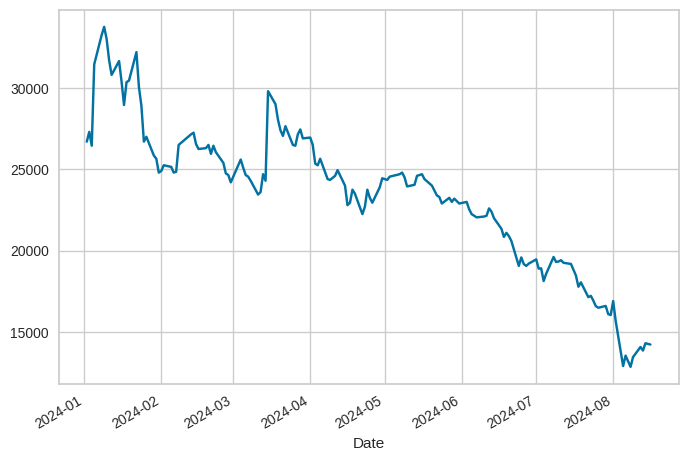

In [ ]:
df['Close'].plot()

In [ ]:
# 전날 대비 가격 차이 계산
df['Diff'] = df['Close'].diff()

# 가격 차이를 기반으로 라벨링
df['Label'] = df['Diff'].apply(lambda x: 1 if x > 0 else (0 if x < 0 else None))


In [ ]:
df

,Open,High,Low,Close,Volume,Diff,Label
Date,,,,,,,
2024-01-02,26650.0,27000.0,26100.0,26700.0,203311.0,NaN,NaN
2024-01-03,26200.0,27650.0,26100.0,27300.0,317685.0,600.0,1.0
2024-01-04,26900.0,27400.0,26350.0,26450.0,161000.0,-850.0,0.0
2024-01-05,26650.0,32650.0,26600.0,31450.0,4674370.0,5000.0,1.0
2024-01-08,33000.0,35900.0,32100.0,33250.0,4404468.0,1800.0,1.0
...,...,...,...,...,...,...,...
2024-08-09,12950.0,13690.0,12950.0,13470.0,52486.0,600.0,1.0
2024-08-12,13350.0,14130.0,13350.0,14090.0,49811.0,620.0,1.0
2024-08-13,14120.0,14120.0,13600.0,13870.0,38075.0,-220.0,0.0


In [ ]:
data = df.dropna()
data

,Open,High,Low,Close,Volume,Diff,Label
Date,,,,,,,
2024-01-03,26200.0,27650.0,26100.0,27300.0,317685.0,600.0,1.0
2024-01-04,26900.0,27400.0,26350.0,26450.0,161000.0,-850.0,0.0
2024-01-05,26650.0,32650.0,26600.0,31450.0,4674370.0,5000.0,1.0
2024-01-08,33000.0,35900.0,32100.0,33250.0,4404468.0,1800.0,1.0
2024-01-09,32950.0,33750.0,31850.0,33750.0,1305214.0,500.0,1.0
...,...,...,...,...,...,...,...
2024-08-09,12950.0,13690.0,12950.0,13470.0,52486.0,600.0,1.0
2024-08-12,13350.0,14130.0,13350.0,14090.0,49811.0,620.0,1.0
2024-08-13,14120.0,14120.0,13600.0,13870.0,38075.0,-220.0,0.0


In [ ]:
X = data.drop("Diff", axis=1).drop("Label", axis=1)
Y = data['Label']

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train_full

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-30,26200.0,26350.0,25250.0,25650.0,165786.0
2024-06-21,20900.0,20900.0,20550.0,20600.0,42750.0
2024-06-07,22100.0,22350.0,22000.0,22050.0,65408.0
2024-04-25,23400.0,23700.0,23100.0,23250.0,65860.0
2024-07-15,19300.0,19370.0,19070.0,19190.0,27889.0
...,...,...,...,...,...
2024-07-18,18450.0,18450.0,17540.0,17790.0,100624.0
2024-07-24,17230.0,17680.0,16940.0,16940.0,46940.0
2024-04-18,22900.0,25150.0,22650.0,23750.0,245317.0


In [ ]:
# http://stackoverflow.com/questions/39525358/neural-network-accuracy-optimization
scaler = StandardScaler()
X = scaler.fit_transform(X_train_full)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y_train_full, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
# create model
model = Sequential()
# model.add(Dense(1000, input_dim=8, init='uniform', activation='relu')) # 1000 neurons
# model.add(Dense(100, kernel_initializer='uniform', activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, kernel_initializer='uniform', activation='relu')) # 500 neurons
# 95.41% accuracy with 500 neurons
# 86.99% accuracy with 100 neurons
# 85.2% accuracy with 50 neurons
# 81.38% accuracy with 10 neurons
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) # 1 output neuron

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - accuracy: 0.4775 - loss: 0.6920 - val_accuracy: 0.5484 - val_loss: 0.6818
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4582 - loss: 0.6911 - val_accuracy: 0.6452 - val_loss: 0.6694
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6074 - loss: 0.6787 - val_accuracy: 0.5806 - val_loss: 0.6724
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6348 - loss: 0.6668 - val_accuracy: 0.5484 - val_loss: 0.6708
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5488 - loss: 0.6720 - val_accuracy: 0.5484 - val_loss: 0.6733
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4928 - loss: 0.6890 - val_accuracy: 0.5806 - val_loss: 0.6748
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6230 - loss: 0.6485 - val_accuracy: 0.5806 - val_loss: 0.6778
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4996 - loss: 0.6983 - val_accuracy: 0.6129 

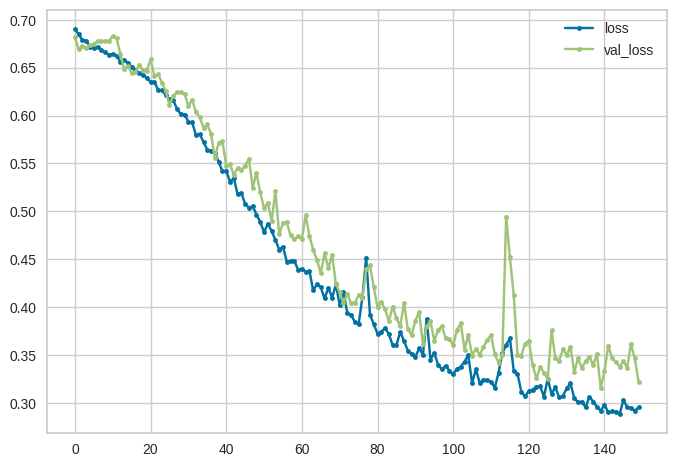

In [ ]:
plt.plot(history.history['loss'], ".-", label='loss');
# plt.plot(history.history['accuracy'], ".-");
plt.plot(history.history['val_loss'], ".-", label='val_loss');
# plt.plot(history.history['val_accuracy'], ".-");
plt.legend();

loss가 계속 줄어 들고 있으니 더 학습해 볼까요?

로그가 많아서 브라우저가 다운될 수 있습니다.  
Callback을 붙여서 epoch 100 마다 로그가 출력되게 해볼께요

In [ ]:
from tensorflow.keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1} ended. Logs: {logs}")

    # def on_batch_end(self, batch, logs=None):
    #     if (batch + 1) % 5 == 0:
    #         print(f"Batch {batch + 1}: Loss = {logs['loss']}")

In [ ]:
# Fit the model
history = model.fit(
    X_train, y_train, epochs=3000, batch_size=10,  verbose=0, validation_data=(X_val, y_val), callbacks=[CustomCallback()])

Epoch 100 ended. Logs: {'accuracy': 0.8804348111152649, 'loss': 0.2633349895477295, 'val_accuracy': 0.8709677457809448, 'val_loss': 0.36566197872161865}
Epoch 200 ended. Logs: {'accuracy': 0.8586956262588501, 'loss': 0.2678959369659424, 'val_accuracy': 0.8387096524238586, 'val_loss': 0.3181142508983612}
Epoch 300 ended. Logs: {'accuracy': 0.9239130616188049, 'loss': 0.220070481300354, 'val_accuracy': 0.8387096524238586, 'val_loss': 0.35671737790107727}
Epoch 400 ended. Logs: {'accuracy': 0.8804348111152649, 'loss': 0.2982170283794403, 'val_accuracy': 0.8064516186714172, 'val_loss': 0.3894997835159302}
Epoch 500 ended. Logs: {'accuracy': 0.8695651888847351, 'loss': 0.24678727984428406, 'val_accuracy': 0.8709677457809448, 'val_loss': 0.3458220064640045}
Epoch 600 ended. Logs: {'accuracy': 0.8913043737411499, 'loss': 0.2094801366329193, 'val_accuracy': 0.8709677457809448, 'val_loss': 0.3662106990814209}
Epoch 700 ended. Logs: {'accuracy': 0.9021739363670349, 'loss': 0.20674237608909607, '

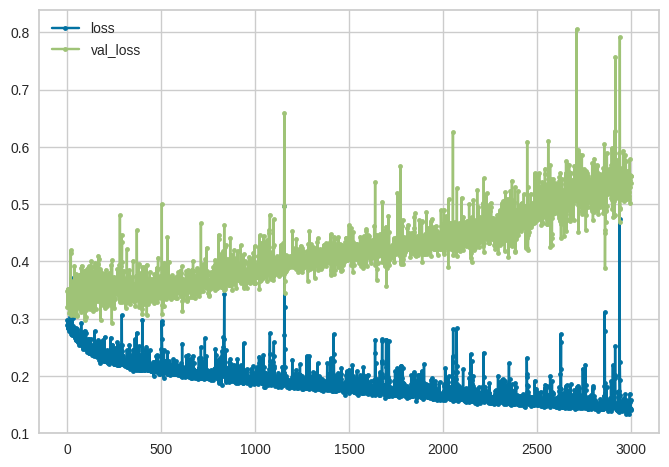

In [ ]:
plt.plot(history.history['loss'], ".-", label='loss');
# plt.plot(history.history['accuracy'], ".-");
plt.plot(history.history['val_loss'], ".-", label='val_loss');
# plt.plot(history.history['val_accuracy'], ".-");
plt.legend();

학습한 모델을 예측해 보겠습니다

In [ ]:
# evaluate the model
scores = model.evaluate(scaler.transform(X_test), y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - accuracy: 0.8710 - loss: 1.1666
compile_metrics: 87.10%


In [ ]:
# calculate predictions
predictions = model.predict(scaler.transform(X_test))    # predicting Y only using X
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


array([[8.8611210e-07],
       [5.7768775e-04],
       [1.4899255e-04],
       [9.9998486e-01],
       [1.2592737e-03],
       [5.6016218e-04],
       [1.2221521e-01],
       [3.1476608e-04],
       [1.0712980e-02],
       [1.1373184e-04],
       [4.6410994e-03],
       [1.2859936e-01],
       [1.0412324e-04],
       [3.7446255e-03],
       [1.0000000e+00],
       [4.5885770e-03],
       [5.6420131e-09],
       [1.2479643e-03],
       [7.2492659e-04],
       [2.8099254e-02],
       [6.2629036e-03],
       [1.0000000e+00],
       [2.6850505e-02],
       [2.5752649e-02],
       [4.2111864e-03],
       [1.0000000e+00],
       [1.9910710e-06],
       [3.6950789e-02],
       [9.9844790e-01],
       [1.0000000e+00],
       [1.6159864e-05]], dtype=float32)

In [ ]:
# Round predictions
rounded = [int(np.round(x, 0)) for x in predictions]
print(rounded)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]


In [ ]:
print("Rounded type: ", type(rounded)) # rounded is a 'list' class
print("Shape of rounded: ", len(rounded))
print("Dataset type: ", type(data)) # numpy array?
print("Shape of dataset: ", data.shape)

Rounded type:  <class 'list'>
Shape of rounded:  31
Dataset type:  <class 'pandas.core.frame.DataFrame'>
Shape of dataset:  (154, 7)


In [ ]:
# Turn rounded from a 'list' class into a numpy array
newRounded = np.array(rounded)
print("Rounded type: ", type(newRounded))

Rounded type:  <class 'numpy.ndarray'>


In [ ]:
newRounded

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
# Add the rounded numpy array (called newRounded) to the end of the dataset numpy array
newDataset = np.column_stack((X_test, newRounded))

In [ ]:
# Create a confusion matrix with the actual values and predicted probabilities
df_confusion = pd.crosstab(y_test, newRounded, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)

In [ ]:
df_confusion

Predicted,0,1,All
Actual,,,
0.0,22,1,23
1.0,3,5,8
All,25,6,31


In [ ]:
df_conf_norm

Predicted,0,1,All
Actual,,,
0.0,0.478261,0.0625,0.370968
1.0,0.065217,0.3125,0.129032
All,0.543478,0.3750,0.500000


## `3. Setup Environment : 여기서 데이터에 대한 추가적인 engineering이 가능합니다`

- data : 사용할 데이터를 입력해 줍니다.

- target : data에서 어떤 데이터를 target으로 할 지 입력합니다. 우리는 투표이기 때문에 "voted"를 입력할 예정입니다.

- train_size : train_test_split과 동일하다고 생각하시면 됩니다. train_size만큼 학습하고, 나머지는 validation data로 사용합니다.

- sample_estimator : 어떤 모델로 예측해 볼 것인지를 입력합니다. 입력하지 않으면 Logistic Regression Model이 자동으로 사용됩니다. 이 sample_estimator를 통해서 다양한 것들을 예측하는데, 대표적으로 train_size를 몇으로 사용할지를 정할 수 있습니다.

- categorical_features : 범주형 변수를 여기에 입력할 수 있습니다.

- silent : True로 설정하면, 입력된 데이터의 형태에 따라서 알아서 데이터를 조정합니다.

- remove_perfect_collinearity : True로 설정하면 상관관계가 1인 피쳐를 삭제합니다.

- fix_imbalance : True로 설정하면 SMOTE를 적용합니다. SMOTE는 클래스가 적은 데이터의 표본을 임의의 값으로 변형해 데이터를 추가하는 방법입니다.

- fix_imbalance_method : imblearn에서 제공하는 다양한 모듈을 적용할 수 있습니다.

- data_split_shuffle : False로 설정하면 데이터 split을 할 때 shuffle하는 것을 막습니다.

- folds_shuffle : False로 설정하면 cross-validation을 할 때 shuffle하는 것을 막습니다.

- n_jobs : 몇개의 processor를 이용할지 입력할 수 있습니다.

- log_experiment : True로 설정하면 로그를 MLFlow 서버에 기록합니다.

- experiment_name : 로그를 기록할 때 사용할 이름입니다.

- log_plots : True로 설정하면 MLFlow에 정확한 plot이 기록됩니다.

- log_profile : True로 설정하면 html파일이 MLFlow에 저장됩니다.

- log_data : True로 설정하면 train, test 데이터가 csv파일로 저장됩니다.

- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [ ]:
data.drop("Diff", axis=1)

,Open,High,Low,Close,Volume,Label
Date,,,,,,
2024-01-03,26200.0,27650.0,26100.0,27300.0,317685.0,1.0
2024-01-04,26900.0,27400.0,26350.0,26450.0,161000.0,0.0
2024-01-05,26650.0,32650.0,26600.0,31450.0,4674370.0,1.0
2024-01-08,33000.0,35900.0,32100.0,33250.0,4404468.0,1.0
2024-01-09,32950.0,33750.0,31850.0,33750.0,1305214.0,1.0
...,...,...,...,...,...,...
2024-08-09,12950.0,13690.0,12950.0,13470.0,52486.0,1.0
2024-08-12,13350.0,14130.0,13350.0,14090.0,49811.0,1.0
2024-08-13,14120.0,14120.0,13600.0,13870.0,38075.0,0.0


In [ ]:
cell_start_time = time()
clf = setup(data = data.drop("Diff", axis=1), target='Label')
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Description,Value
0,Session id,6070
1,Target,Label
2,Target type,Binary
3,Original data shape,"(154, 6)"
4,Transformed data shape,"(154, 6)"
5,Transformed train set shape,"(107, 6)"
6,Transformed test set shape,"(47, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


CELL RUN TIME :  6.184688329696655


## `4. 데이터에 적합한 모델을 찾기 위해 Compare Models 사용하기`
- top 5 모델 (Pycaret에서 부르는 약칭)
    - Gradient Boosting Classifier (gbc)
    - Catboost Classifier (catboost)
    - Light Gradient Boosting Machine (lightgbm)
    - Linear Discriminant Analysis (lda)
    - Logistic Regression (lr)

In [ ]:
cell_start_time = time()
top5_models = compare_models(fold = 5, round = 3, sort = 'AUC', n_select = 5)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.869,0.935,0.817,0.859,0.834,0.726,0.730,1.736
ridge,Ridge Classifier,0.831,0.909,0.639,0.931,0.752,0.634,0.663,0.028
lda,Linear Discriminant Analysis,0.831,0.909,0.639,0.931,0.752,0.634,0.663,0.030
qda,Quadratic Discriminant Analysis,0.803,0.903,0.594,0.913,0.704,0.572,0.612,0.030
xgboost,Extreme Gradient Boosting,0.672,0.735,0.642,0.610,0.617,0.334,0.342,0.088
lightgbm,Light Gradient Boosting Machine,0.663,0.721,0.525,0.597,0.556,0.290,0.291,0.152
gbc,Gradient Boosting Classifier,0.627,0.655,0.528,0.564,0.530,0.227,0.237,0.116
ada,Ada Boost Classifier,0.683,0.650,0.547,0.672,0.592,0.337,0.350,0.118
et,Extra Trees Classifier,0.664,0.650,0.528,0.643,0.571,0.300,0.309,0.168
catboost,CatBoost Classifier,0.627,0.631,0.439,0.634,0.479,0.207,0.238,1.362


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

CELL RUN TIME :  29.881217002868652


In [ ]:
top5_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=6070, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=6070, solver='auto',
                 tol=0.0001),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
          

## `5. Create Models`
#### create_model(estimator = None, ensemble = False, method = None, fold = 10, round = 4, cross_validation = True, verbose = True, system = True, **kwargs)

- estimator : 어떤 모델을 사용할 것인가?
- ensemble : estimator를 앙상블 한 결과를 나타냅니다.
- method : bagging, boosting 선택 가능합니다.
- fold : K-fold의 수로, 최소 2 이상의 숫자를 입력합니다.
- round : 점수 반올림으로 표시할 자리를 적습니다.
- cross_validation : True로 설정하면 cross_validation을 사용합니다.
- verbose : True로 설정하면 진행중인 상황이 나타납니다.
- system : internal function으로 인해 바뀌는 것을 제외하고는 항상 True를 입력해야 합니다.

In [ ]:
total_models = []
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### Gradient Boosting Classifier (gbc)

In [ ]:
cell_start_time = time()
model_gbc = create_model('gbc', fold = 5)
total_models.append(model_gbc)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.5214,0.5556,0.4545,0.5000,0.0909,0.0925
1,0.6364,0.6026,0.3333,0.6000,0.4286,0.1927,0.2106
2,0.6190,0.5833,0.5556,0.5556,0.5556,0.2222,0.2222
3,0.6667,0.7083,0.4444,0.6667,0.5333,0.2899,0.3043
4,0.6667,0.8606,0.7500,0.5455,0.6316,0.3408,0.3553
Mean,0.6268,0.6552,0.5278,0.5644,0.5298,0.2273,0.2370
Std,0.0446,0.1190,0.1383,0.0696,0.0666,0.0856,0.0898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  1.1904757022857666


#### Catboost Classifier (catboost)

In [ ]:
cell_start_time = time()
model_catboost = create_model('catboost', fold = 5)
total_models.append(model_catboost)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_catboost

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4545,0.5128,0.3333,0.3333,0.3333,-0.1282,-0.1282
1,0.6818,0.7179,0.2222,1.0000,0.3636,0.2524,0.3801
2,0.6190,0.6111,0.4444,0.5714,0.5000,0.2000,0.2041
3,0.6667,0.6019,0.4444,0.6667,0.5333,0.2899,0.3043
4,0.7143,0.7115,0.7500,0.6000,0.6667,0.4220,0.4301
Mean,0.6273,0.6311,0.4389,0.6343,0.4794,0.2072,0.2381
Std,0.0917,0.0765,0.1760,0.2147,0.1209,0.1831,0.1984


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  6.019120454788208


#### Light Gradient Boosting Machine (lightgbm)

In [ ]:
cell_start_time = time()
model_lightgbm = create_model('lightgbm', fold = 5)
total_models.append(model_lightgbm)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_lightgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6364,0.7009,0.5556,0.5556,0.5556,0.2479,0.2479
1,0.7273,0.7949,0.6667,0.6667,0.6667,0.4359,0.4359
2,0.7143,0.7685,0.5556,0.7143,0.6250,0.4000,0.4082
3,0.4762,0.5278,0.2222,0.3333,0.2667,-0.1159,-0.1217
4,0.7619,0.8125,0.6250,0.7143,0.6667,0.4828,0.4854
Mean,0.6632,0.7209,0.5250,0.5968,0.5561,0.2901,0.2911
Std,0.1021,0.1038,0.1572,0.1439,0.1503,0.2178,0.2212


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  0.8233742713928223


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6070, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

#### Linear Discriminant Analysis (lda)

In [ ]:
cell_start_time = time()
model_lda = create_model('lda', fold = 5)
total_models.append(model_lda)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_lda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9402,0.5556,1.0000,0.7143,0.5963,0.6518
1,0.9091,0.9060,0.7778,1.0000,0.8750,0.8053,0.8210
2,0.7143,0.7870,0.4444,0.8000,0.5714,0.3824,0.4196
3,0.8571,0.9907,0.6667,1.0000,0.8000,0.6957,0.7303
4,0.8571,0.9231,0.7500,0.8571,0.8000,0.6897,0.6934
Mean,0.8312,0.9094,0.6389,0.9314,0.7521,0.6339,0.6632
Std,0.0652,0.0674,0.1242,0.0859,0.1037,0.1421,0.1340


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  0.6855568885803223


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

#### Logistic Regression (lr)

In [ ]:
cell_start_time = time()
model_lr = create_model('lr', fold = 5)
total_models.append(model_lr)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9487,0.8889,0.8889,0.8889,0.8120,0.8120
1,0.8636,0.8974,0.8889,0.8000,0.8421,0.7227,0.7258
2,0.8095,0.9167,0.6667,0.8571,0.7500,0.6000,0.6124
3,0.9524,1.0000,0.8889,1.0000,0.9412,0.9014,0.9058
4,0.8095,0.9135,0.7500,0.7500,0.7500,0.5962,0.5962
Mean,0.8688,0.9353,0.8167,0.8592,0.8344,0.7264,0.7304
Std,0.0560,0.0364,0.0923,0.0850,0.0757,0.1191,0.1178


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CELL RUN TIME :  0.9181032180786133


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6070, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## `6. Tune Models`
#### tune_model(estimator = None,  fold = 10,  round = 4,  n_iter = 10, custom_grid = None,  optimize = ‘Accuracy’, choose_better = False, verbose = True)
- estimator : 사용할 모델을 입력합니다.
- fold : K-fold의 수로, 최소 2 이상의 숫자를 입력합니다.
- round : 점수 반올림으로 표시할 자리를 적습니다.
- n_iter : Random Grid Search를 한 회차당 반복할 회수입니다.
- custom_grid : 직접 파라미터의 범위를 조정할 수 있습니다.
- optimize : 파라미터 튜닝 과정에서 어떤 점수를 따라갈 것인지 선택 가능합니다. 'Accuracy','AUC','Recall','Precision', 'F1'
- choose_better : True로 설정하면 성능이 높아지지 않을 경우 tuning을 하지 않은 모델을 반환합니다.
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [ ]:
total_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=6070, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=6070, reg_alpha=0.0, reg_la

In [ ]:
model_gbc = tune_model(model_gbc, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.6410,0.6667,0.5000,0.5714,0.1951,0.2025
1,0.8182,0.8718,0.5556,1.0000,0.7143,0.5963,0.6518
2,0.6190,0.6667,0.4444,0.5714,0.5000,0.2000,0.2041
3,0.5714,0.6111,0.4444,0.5000,0.4706,0.1127,0.1132
4,0.7619,0.8942,0.8750,0.6364,0.7368,0.5291,0.5516
Mean,0.6723,0.7370,0.5972,0.6416,0.5986,0.3267,0.3447
Std,0.0989,0.1207,0.1615,0.1863,0.1089,0.1964,0.2148


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
model_catboost = tune_model(model_catboost, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.5470,0.5556,0.4545,0.5000,0.0909,0.0925
1,0.7273,0.6325,0.4444,0.8000,0.5714,0.3945,0.4312
2,0.5714,0.5648,0.4444,0.5000,0.4706,0.1127,0.1132
3,0.6667,0.7593,0.4444,0.6667,0.5333,0.2899,0.3043
4,0.6667,0.7885,0.7500,0.5455,0.6316,0.3408,0.3553
Mean,0.6355,0.6584,0.5278,0.5933,0.5414,0.2457,0.2593
Std,0.0672,0.0989,0.1192,0.1252,0.0563,0.1223,0.1341


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
model_lightgbm = tune_model(model_lightgbm, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7265,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5909,0.6239,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.5714,0.4722,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5714,0.5602,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6190,0.7260,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.5887,0.6218,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0175,0.0980,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
model_lda = tune_model(model_lda, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.6068,0.0000,0.0000,0.0000,-0.0891,-0.1816
1,0.6364,0.5214,0.1111,1.0000,0.2000,0.1287,0.2623
2,0.6667,0.7222,0.2222,1.0000,0.3636,0.2462,0.3746
3,0.5714,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6667,0.6346,0.3750,0.6000,0.4615,0.2383,0.2522
Mean,0.6173,0.6303,0.1417,0.5200,0.2050,0.1048,0.1415
Std,0.0500,0.0666,0.1428,0.4490,0.1871,0.1319,0.2028


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
model_lr = tune_model(model_lr, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9487,0.8889,0.8889,0.8889,0.8120,0.8120
1,0.8636,0.8974,0.8889,0.8000,0.8421,0.7227,0.7258
2,0.8095,0.9167,0.6667,0.8571,0.7500,0.6000,0.6124
3,0.9524,1.0000,0.8889,1.0000,0.9412,0.9014,0.9058
4,0.8095,0.9135,0.7500,0.7500,0.7500,0.5962,0.5962
Mean,0.8688,0.9353,0.8167,0.8592,0.8344,0.7264,0.7304
Std,0.0560,0.0364,0.0923,0.0850,0.0757,0.1191,0.1178


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_models = [model_gbc, model_catboost, model_lightgbm, model_lda, model_lr]

## `7. Plot Models`
AUC Plot / Precision-Recall Curve / Feature Importance / Confusion Matrix를 확인할 수 있습니다.

### AUC Plot

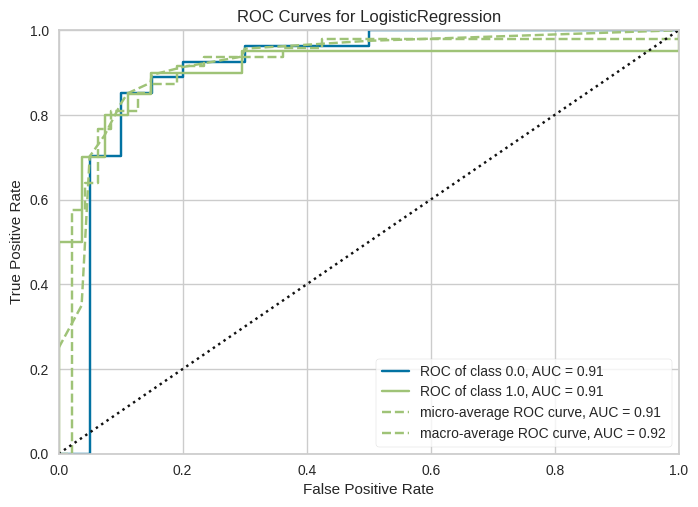

In [ ]:
plot_model(model_lr, plot='auc')

### Precision-Recall Curve

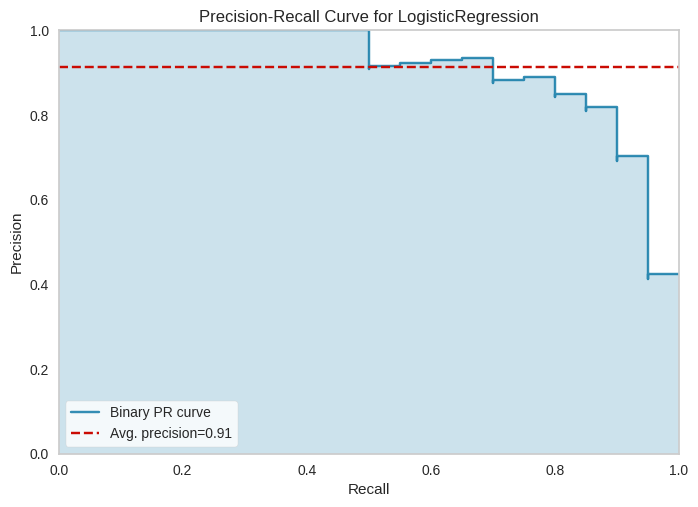

In [ ]:
plot_model(model_lr, plot='pr')

### Feature Importance Plot

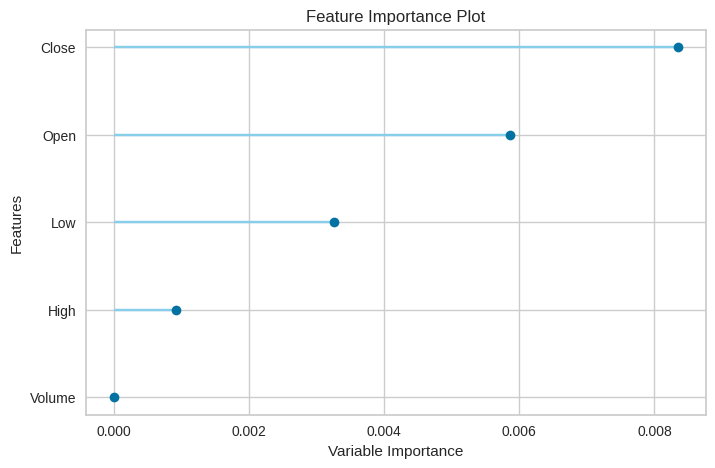

In [ ]:
plot_model(model_lr, plot='feature')

### Confusion Matrix

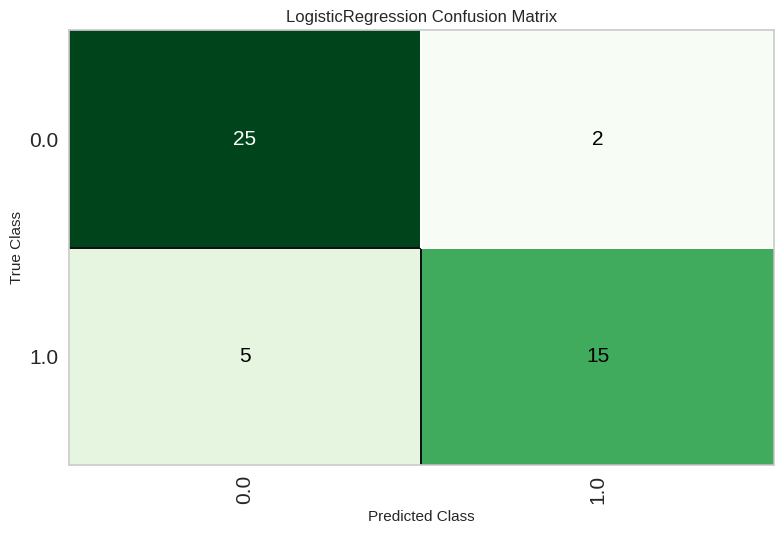

In [ ]:
plot_model(model_lr, plot = 'confusion_matrix')

## `8.Predict for validation data`
#### predict_model(estimator, data=None, probability_threshold=None, platform=None, authentication=None, verbose=True)
`3. setup environment`에서 우리는 train_size = 0.7 (default)로 설정했었습니다. 여기서 남은 0.3의 데이터를 통해 해당 모델이 어느정도의 정확성을 가지고 있는지 보여줍니다.
- estimator : 사용할 모델을 입력합니다.
- data : 다른 데이터를 직접 입력해 줄 수 있습니다. 다만, `3.setup environment`에서 사용한 데이터와 같은 형태여야 합니다.
- probability_threshold : default는 0.5로 지정되어 있으며, 그 수치를 바꿀 수 있습니다.
- platform : cloud에서 모델을 불러올 수 있습니다.
- authentication : 인증된 토큰을 입력할 수 있습니다. (플랫폼이 aws면 {‘bucket’ : ‘Name of Bucket on S3’}의 형태를 따라야 합니다)
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [ ]:
for model in tuned_models:
    display(predict_model(model))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6383,0.5426,0.3500,0.6364,0.4516,0.2144,0.2357


,Open,High,Low,Close,Volume,Label,prediction_label,prediction_score
Date,,,,,,,,
2024-07-23,17150.0,17600.0,17150.0,17230.0,56759.0,1.0,0,0.9596
2024-05-21,24000.0,24450.0,23700.0,23700.0,80924.0,0.0,1,0.8156
2024-04-29,23300.0,24000.0,23050.0,23900.0,93185.0,1.0,0,0.9658
2024-08-14,14250.0,14380.0,14110.0,14320.0,56063.0,1.0,0,0.9759
2024-05-29,23200.0,23750.0,23000.0,23200.0,83285.0,1.0,1,0.5045
2024-02-29,24550.0,24600.0,24100.0,24200.0,108712.0,0.0,0,0.9978
2024-06-19,20550.0,21450.0,20550.0,21100.0,73544.0,1.0,0,0.9966
2024-07-10,19330.0,19500.0,19030.0,19340.0,40195.0,1.0,0,0.9639
2024-01-17,30650.0,31200.0,28750.0,28950.0,419297.0,0.0,0,0.8473


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5532,0.5667,0.2500,0.4545,0.3226,0.0295,0.0324


,Open,High,Low,Close,Volume,Label,prediction_label,prediction_score
Date,,,,,,,,
2024-07-23,17150.0,17600.0,17150.0,17230.0,56759.0,1.0,0,0.9751
2024-05-21,24000.0,24450.0,23700.0,23700.0,80924.0,0.0,1,0.9251
2024-04-29,23300.0,24000.0,23050.0,23900.0,93185.0,1.0,1,0.6789
2024-08-14,14250.0,14380.0,14110.0,14320.0,56063.0,1.0,0,0.9905
2024-05-29,23200.0,23750.0,23000.0,23200.0,83285.0,1.0,1,0.9192
2024-02-29,24550.0,24600.0,24100.0,24200.0,108712.0,0.0,0,0.9948
2024-06-19,20550.0,21450.0,20550.0,21100.0,73544.0,1.0,0,0.5736
2024-07-10,19330.0,19500.0,19030.0,19340.0,40195.0,1.0,0,0.9943
2024-01-17,30650.0,31200.0,28750.0,28950.0,419297.0,0.0,0,0.9901


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5745,0.5176,0.2500,0.5000,0.3333,0.0693,0.0783


,Open,High,Low,Close,Volume,Label,prediction_label,prediction_score
Date,,,,,,,,
2024-07-23,17150.0,17600.0,17150.0,17230.0,56759.0,1.0,0,0.7927
2024-05-21,24000.0,24450.0,23700.0,23700.0,80924.0,0.0,0,0.5021
2024-04-29,23300.0,24000.0,23050.0,23900.0,93185.0,1.0,0,0.6822
2024-08-14,14250.0,14380.0,14110.0,14320.0,56063.0,1.0,0,0.7927
2024-05-29,23200.0,23750.0,23000.0,23200.0,83285.0,1.0,0,0.5604
2024-02-29,24550.0,24600.0,24100.0,24200.0,108712.0,0.0,0,0.9306
2024-06-19,20550.0,21450.0,20550.0,21100.0,73544.0,1.0,1,0.6718
2024-07-10,19330.0,19500.0,19030.0,19340.0,40195.0,1.0,0,0.6623
2024-01-17,30650.0,31200.0,28750.0,28950.0,419297.0,0.0,0,0.5147


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8085,0.8963,0.6500,0.8667,0.7429,0.5952,0.6109


,Open,High,Low,Close,Volume,Label,prediction_label,prediction_score
Date,,,,,,,,
2024-07-23,17150.0,17600.0,17150.0,17230.0,56759.0,1.0,0,0.7486
2024-05-21,24000.0,24450.0,23700.0,23700.0,80924.0,0.0,0,0.8802
2024-04-29,23300.0,24000.0,23050.0,23900.0,93185.0,1.0,1,0.9375
2024-08-14,14250.0,14380.0,14110.0,14320.0,56063.0,1.0,0,0.7256
2024-05-29,23200.0,23750.0,23000.0,23200.0,83285.0,1.0,0,0.6643
2024-02-29,24550.0,24600.0,24100.0,24200.0,108712.0,0.0,0,0.8760
2024-06-19,20550.0,21450.0,20550.0,21100.0,73544.0,1.0,1,0.8412
2024-07-10,19330.0,19500.0,19030.0,19340.0,40195.0,1.0,0,0.6197
2024-01-17,30650.0,31200.0,28750.0,28950.0,419297.0,0.0,0,0.9974


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8511,0.9074,0.7500,0.8824,0.8108,0.6893,0.6955


,Open,High,Low,Close,Volume,Label,prediction_label,prediction_score
Date,,,,,,,,
2024-07-23,17150.0,17600.0,17150.0,17230.0,56759.0,1.0,0,0.6548
2024-05-21,24000.0,24450.0,23700.0,23700.0,80924.0,0.0,0,0.8832
2024-04-29,23300.0,24000.0,23050.0,23900.0,93185.0,1.0,1,0.9955
2024-08-14,14250.0,14380.0,14110.0,14320.0,56063.0,1.0,0,0.7219
2024-05-29,23200.0,23750.0,23000.0,23200.0,83285.0,1.0,1,0.5308
2024-02-29,24550.0,24600.0,24100.0,24200.0,108712.0,0.0,0,0.9159
2024-06-19,20550.0,21450.0,20550.0,21100.0,73544.0,1.0,1,0.9832
2024-07-10,19330.0,19500.0,19030.0,19340.0,40195.0,1.0,0,0.5294
2024-01-17,30650.0,31200.0,28750.0,28950.0,419297.0,0.0,0,0.9999


## `9.Finalize for Deployment`
#### finalize_model(estimator)
생성한 모델을 최종적으로 사용할 모델로 변환합니다. 이 과정에서는 train_size = 1로, 모든 데이터를 사용해 재학습합니다.
- Catboost Classifier가 가장 AUC Score가 높았기 때문에, model_cat 단일 모델을 finalize 합니다.

In [ ]:
final_model = finalize_model(model_catboost)

## `10. Prediction`
- predict를 진행하면, 데이터의 마지막열에 "Label", "Score" 2가지 열이 추가됩니다.
    - Label은 예측한 결과값 입니다.
    - Score은 결과값이 나올 확률 입니다. Score를 기반으로 0.5를 넘기면 1, 넘기지 못하면 0으로 Label이 적용됩니다.

In [ ]:
prediction = predict_model(final_model, data=X_test)
prediction

,Open,High,Low,Close,Volume,prediction_label,prediction_score
Date,,,,,,,
2024-03-29,27950.0,27950.0,26900.0,26900.0,225376.0,0,0.9889
2024-02-21,26450.0,26950.0,25950.0,25950.0,137735.0,0,0.9905
2024-04-15,24650.0,24650.0,23800.0,24000.0,134090.0,0,0.9871
2024-08-06,12600.0,14090.0,12600.0,13560.0,112733.0,1,0.9751
2024-02-19,26600.0,26900.0,26200.0,26300.0,165564.0,1,0.9655
2024-06-13,22800.0,22800.0,22400.0,22400.0,66507.0,0,0.9874
2024-05-28,23000.0,23250.0,22950.0,23000.0,61238.0,0,0.9801
2024-01-23,31700.0,31750.0,29600.0,30050.0,450013.0,0,0.9890
2024-03-21,27650.0,28250.0,26600.0,27050.0,426282.0,0,0.9904


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, prediction['prediction_label'])

1.0

## `11. Save Model`
#### save_model(model, model_name, verbose=True)
- model : 저장할 모델을 입력합니다.
- model_name : 저장할 모델의 이름을 입력합니다.
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [ ]:
save_model(final_model,'stock_predict_20240816')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Open', 'High', 'Low', 'Close',
                                              'Volume'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                     

## `12. Load Model`
#### load_model(model_name, platform = None, authentication = None, verbose=True)
- model_name : 불러올 모델의 이름을 입력합니다.
- platform : cloud에서 모델을 불러올 수 있습니다.
- authentication : 인증된 토큰을 입력할 수 있습니다. (플랫폼이 aws면 {‘bucket’ : ‘Name of Bucket on S3’}의 형태를 따라야 합니다)
- verbose : True로 설정하면 진행중인 상황이 나타납니다.

In [ ]:
saved_final_model = load_model('stock_predict_20240816')

new_prediction = predict_model(saved_final_model, data=X_test)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,Open,High,Low,Close,Volume,prediction_label,prediction_score
Date,,,,,,,
2024-03-29,27950.0,27950.0,26900.0,26900.0,225376.0,0,0.9889
2024-02-21,26450.0,26950.0,25950.0,25950.0,137735.0,0,0.9905
2024-04-15,24650.0,24650.0,23800.0,24000.0,134090.0,0,0.9871
2024-08-06,12600.0,14090.0,12600.0,13560.0,112733.0,1,0.9751
2024-02-19,26600.0,26900.0,26200.0,26300.0,165564.0,1,0.9655
